# Linear regression tutorial


##### reference https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


#### The basic idea
The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. For example, let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this:

P = 90 * S

[ Note that the unit of x, meters, cancels out

P = 90 dollars/meters * S meters = 90 * S dollars
]


With this model, we can then predict the cost of any house. If we have a house that is 1,500 square feet, we can calculate its price to be:

P = 90*1500 = $135,000 

This concept is commonly taught in Algebra in the form of:

$y = mx + b$, where m is the slope equal to $ \Delta y $ / $ \Delta x $, and b is the y-intersect (or baseline), the value y at x = 0.

$y$ is the dependent variable, because it depends on x, meaning it varies with it.  A value of $\beta > 0$ or $\beta<0$ implies that x and y are correlated.

In statistical learning, the notation changes to $y = \beta_1 x + \beta_0 $, absorbing both parameters into the vector $ \beta  = [m, b] =  [ \beta_1, \beta_0] $, which is a cleaner notation to do math and to generalize the problem beyond a single independent variable, x.

#### The model

There are two kinds of variables in a linear regression model:

The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
The output variable is the variable that we want to predict. It is commonly referred to as Y.
To estimate Y using linear regression, we assume the equation:

$y_e = \beta_1 x + \beta_0 $
where $y_e$ is the estimated or predicted value of Y based on our linear equation.

Our goal is to find statistically significant values of the parameters $\beta_1$ and $ \beta_0 $ that minimise the difference between the true Y and our estimate $y_e$.


This practical tutorial will show how to acomplish this with the software package sci-kit learn and introduce other important concepts such as model evaluation.

A description of a theoretical solution to to this problem can be found in the (Appendix), as well as a numerical solution coded from scratch. These sections set the stage for machine learning, and can help build useful intuitions on the subject since ML combines similar theoretical intuitions with efficient algorithms for numerical computations to solve these types of problems.  However, the appendix is absolutely not obligatory to understand and apply Linear regression and machine learning.

# Practical Tutorial

# Load Libraries

In [1]:
# Load standard libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load simple Linear regression library
from sklearn.linear_model import LinearRegression


# Load and visualize data

In [2]:
# Import and display first five rows of advertising dataset
data = pd.read_csv('advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

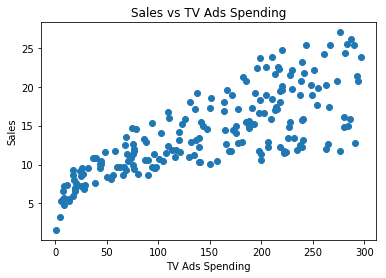

In [3]:
# Plot Sales data against TV advertising spending
plt.scatter(data.TV, data.sales)
plt.title('Sales vs TV Ads Spending')
plt.xlabel('TV Ads Spending')
plt.ylabel('Sales')

# Fit Linear Model

We apply the linear model

$y = \beta_1 x + \beta_0 $

to model sales as a function of TV ads spending, that is:

$sales = \beta_1 TV + \beta_0 $

Where $y = \beta_1 x$ represents the linear relationship between x and y, where parameter $\beta_1$ is the weight that needs to be applied to x to transform it into y, and $\beta_0$ $ is the baseline (e.g. the y-intersect or mean bias of the model).

Ignoring the effects of any other variables, $ b_0 $ tells us how many sales occur when TV Ads spending is 0.

Parameters $\beta_0 $ and $\beta_1$ are chosen such that the difference between the model output $y_{model} = \beta_1 x + \beta_0$ and the true value of $y_{true}$ is at its minimum value.  This is done automatically by sci-kit learn using the Ordinary Least Squares algorithm (see Apendix).  

In [4]:
# Build linear regression model using TV as predictor
# Split data into predictors X and output Y
predictors = ['TV']
X = data[predictors]
y = data['sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model.intercept_}')
print(f'beta = {model.coef_}')

beta_0 = 7.032593549127695
beta = [0.04753664]


### Sales =  0.0475*TV + 7.03

Text(0, 0.5, 'Sales')

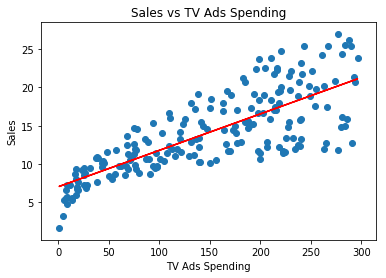

In [5]:
# Overlay the linear fit to the plot of sales vs tv spending
linear_prediction = model.predict(X)
plt.plot(data.TV, linear_prediction, 'r')
plt.scatter(data.TV, data.sales)
plt.title('Sales vs TV Ads Spending')
plt.xlabel('TV Ads Spending')
plt.ylabel('Sales')

# Can we do better with a quadratic term?

In [6]:
# Build linear regression model using TV and TV^2 as predictors
# Split data into predictors X and output Y

data['TV2'] = data['TV']*data['TV']
predictors = ['TV', 'TV2']
X = data[predictors]
y = data['sales']

# Initialise and fit model
lm2 = LinearRegression()
model_2 = lm2.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model_2.intercept_}')
print(f'betas = {model_2.coef_}')

beta_0 = 6.1141201283331075
betas = [ 6.72659270e-02 -6.84693373e-05]


### Sales =  -6.84693373e-05 * $TV^2$ + 6.72659270e-02*TV + 6.114

Text(0, 0.5, 'Sales')

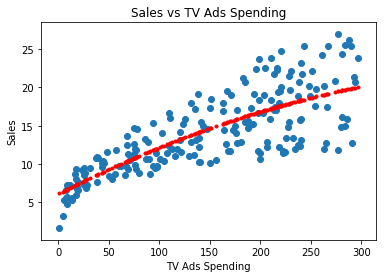

In [7]:
# Overlay the quadratic fit to the plot of sales vs tv spending
quadratic_prediction = model_2.predict(X)
plt.plot(data.TV, quadratic_prediction, '.r')
plt.scatter(data.TV, data.sales)
plt.title('Sales vs TV Ads Spending')
plt.xlabel('TV Ads Spending')
plt.ylabel('Sales')

Text(0.5, 0, 'Sales')

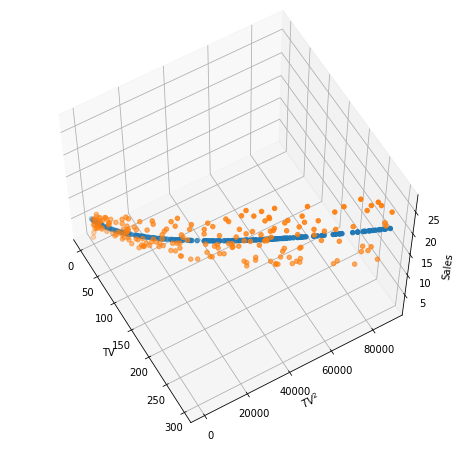

In [8]:
# We can visualize this in 3d

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.TV, data.TV2, quadratic_prediction)
ax.scatter(data.TV, data.TV2, data.sales)
ax.view_init(elev=60., azim=-30)
ax.set_xlabel('TV')
ax.set_ylabel('$TV^2$')
ax.set_zlabel('Sales')


The solution $\beta = [\beta_0, \beta_1, \beta_2] $ is a vector of dimension 3, which defines plane that can be visualized with a contour plot.

Note: 2 non-intersecting points define a line in 2d space, 3 non-intersecting points define a plane in 3d space.


Text(0.5, 0, 'Sales')

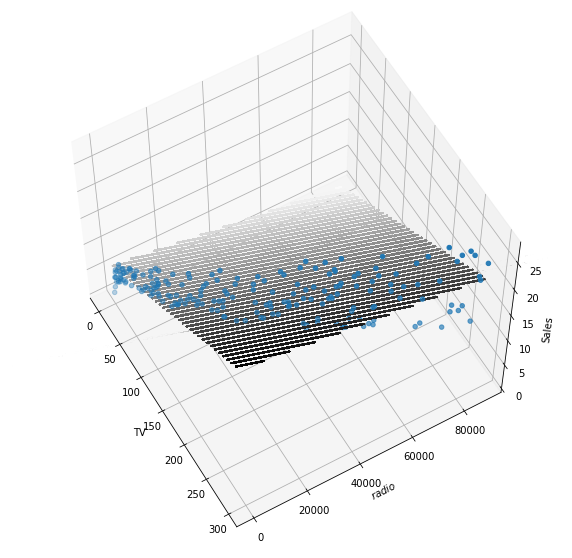

In [9]:
def f(x, x2):
    return model.intercept_ + model_2.coef_[0]*x + model_2.coef_[1]*x2

x, x2 = np.meshgrid(data.TV, data.TV2)
Z = f(x, x2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(x, x2, Z, 50, cmap='binary')

ax.scatter(data.TV, data.TV2, data.sales)
ax.view_init(elev=60., azim=-30)
ax.set_xlabel('TV')
ax.set_ylabel('$radio$')
ax.set_zlabel('Sales')

# Model Evaluation

In order to choose a model, we need to compare their performance, in science it is common to use the 'goodness-of-fit' R2.  

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

$ R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}} $,

where 

$ SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2} $

is the residual sum of squared errors 

and 

$ SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2} $

is proportional to the variance of the data


$ \sigma^2 =\sum _{i}^{n}(y_{i}-{\bar {y}})^{2} / n$


In [10]:
from sklearn.metrics import r2_score

#R^2 (coefficient of determination) regression score function.

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


print(f'linear model = {r2_score(y, linear_prediction)}')

print(f'quadratic model = {r2_score(y, quadratic_prediction)}')


linear model = 0.611875050850071
quadratic model = 0.6190371168872755


####  In business, it is best practice to report things in business units, so metrics like the mean percentage error (MAPE) can be more useful than R2.  When evaluating a model using the MAPE metric, the winnig model is the one with the lowest value.

In [11]:
# Define MAPE evaluation metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Here the winning model is the one with the lower MAPE 

print(f'linear model = {mean_absolute_percentage_error(y, linear_prediction)}')

print(f'quadratic model = {mean_absolute_percentage_error(y, quadratic_prediction)}')

linear model = 20.576595439207786
quadratic model = 20.031422835794753


# Multiple linear regression

The problem naturally expands to the case of more dependent variables , for example with 2 variables, $x_1$ and $ x_2$ ,  $y = \beta_0 + \beta_1*x_1 + \beta_1*x_2 $

Luckily we can use the exact same code from the linear regression to predict sales using TV and radio data


In [12]:
from scipy import stats

# Build linear regression model using TV as predictor
# Split data into predictors X and output Y
predictors = ['TV', 'radio']

# It is good practice to z-score predictors with different units
# such that they are all varying from approximately from -2 to 2 (z-distributed)
X = stats.zscore(data[predictors])
y = data['sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model.intercept_}')
print(f'betas = {model.coef_}')

# Produce a prediction with these 2 variables
mlr_prediction = model.predict(X)

beta_0 = 14.0225
betas = [3.91841179 2.78412788]


# Exercise

In [ ]:
# Visualize the model as a plane
# Code:


Text(0.5, 0, 'Sales')

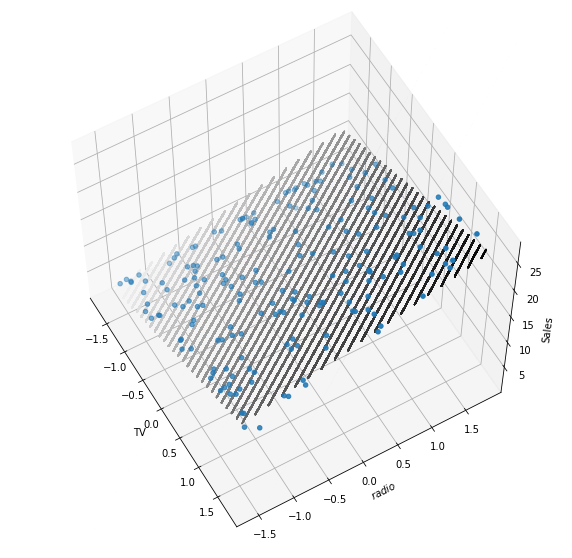

In [13]:
# Solution:

def f(X, Y):
    return model.intercept_ + model.coef_[0]*X + model.coef_[1]*Y

X, Y = np.meshgrid(stats.zscore(data.TV), stats.zscore(data.radio))
Z = f(X,Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.scatter(stats.zscore(data.TV),stats.zscore(data.radio),data.sales)
ax.view_init(elev=60., azim=-30)
ax.set_xlabel('TV')
ax.set_ylabel('$radio$')
ax.set_zlabel('Sales')

In [14]:
# Lets compare the 3 models first with R2

print(f'linear model = {r2_score(y, linear_prediction)}')

print(f'quadratic model = {r2_score(y, quadratic_prediction)}')

print(f'multiple linear regression = {r2_score(y, mlr_prediction)}')



linear model = 0.611875050850071
quadratic model = 0.6190371168872755
multiple linear regression = 0.8971942610828956


In [15]:
# and now with MAPE

print(f'linear model = {mean_absolute_percentage_error(y, linear_prediction)}')

print(f'quadratic model = {mean_absolute_percentage_error(y, quadratic_prediction)}')

print(f'multiple linear regression = {mean_absolute_percentage_error(y, mlr_prediction)}')


linear model = 20.576595439207786
quadratic model = 20.031422835794753
multiple linear regression = 13.884310851781144


# Exercise
As an exercise, use TV, Radio, and Newspaper to predict sales using the linear model

In [16]:
# Code exercise


# Appendix

Let's try to solve the simple linear model without using sci-kit learn!

In [17]:
# Build linear regression model using TV as predictor
# Split data into predictors X and output Y
X = data['TV']
y = data['sales']


### Ordinary Least Squares 

We want to find an approximation or estimate $y_e$ for variable $y$ which has the smallest error possible.
This can be accomplished by minimize the residual sum of squared errors (RSSE).  The squared term is so that positive and negative deviations from $y$ are penalized equally.

residual sum of squared errors = $\sum _{i=1}^{n}(y_{i}-x_{i}^{\mathrm {T} }\beta)^{2}=(y-X\beta)^{\mathrm {T} }(y-X\beta)$

We next show how numerical (trial and error) methods can be used in order to find the value of vector $\beta$ that produces the smallest sum of the squared values.  However for the linear model it is actually posible to find an analytial solution (a formula) with a bit of calculus.

We will skip the calculus, but highlight that since our goal is to minimize the RSSE, and this quantity depends on $\beta^2$, we know that we can always find a solution since RSSE is a quadratic equation (i.e. it is a parabolla, see numerical solution for a visual). 


## Analytical Solution

The bit of calculus involves taking the derivative of RSSE and setting it equal to zero in order to solve for $\beta$, but we skip the proof and jump to the result.

It can be shown that $\beta_1 = Cov(X, Y) / Var(X) $.

Using the computed value of $\beta_1$,  we can then find $\beta_0 = \mu_y - \beta_1 * \mu_x $

, where $\mu_x $ and $\mu_y$ are the means of x and y.

In [18]:
# We skip the calculus, and just show that the analytical formulas give the same result as sci-kit learn

# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
xycov = (X - xmean) * (y - ymean)
xvar =  (X - xmean)**2 

# Calculate beta and alpha
beta = xycov.sum() / xvar.sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')


alpha = 7.0325935491276965
beta = 0.047536640433019736


# Sci-kit learn

In [19]:
# Compare this to what we got using sci-kit learn

predictors = ['TV']
X = data[predictors]
y = data['sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model.intercept_}')
print(f'beta = {model.coef_}')

beta_0 = 7.032593549127695
beta = [0.04753664]


# Numerical solution
Let's iteratively take some brute-force guesses both $\beta_1$ and $\beta_0$ and record how well we do.

In [20]:
# This can take a couple minutes, it's the worst algorithm one could write, but it gets the job done.
rsse = []
beta1s = []
beta0s = []

# We cheat a bit narrowing our search for the optimal Betas on range 1 and range 2
range1 =  np.linspace(-1,1,200)
range0 = np.linspace(0,10,200)

# Compute the RSSE over all values of range 1 and range 0
for beta1 in range1:
    for beta0 in range0:
        rsse.append(np.sum((y-(X['TV']*beta1+beta0))**2))
        beta1s.append(beta1)
        beta0s.append(beta0)

In [21]:
# Print the solution
print(f'beta_0 = {beta0s[np.argmin(rsse)]}')
print(f'beta = {beta1s[np.argmin(rsse)]}')

beta_0 = 7.386934673366834
beta = 0.045226130653266416


# We visualize the model as plane
# Broken

def f(beta1, beta0):
    return np.sum((y-(X['TV']*beta1+beta0))**2)

beta1, beta0 = np.meshgrid(range1[:], range0[:])
Z = f(beta1,beta0)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(beta1, beta0, Z, 50, cmap='binary')

ax.scatter(beta0,beta1,Z)
ax.view_init(elev=60., azim=-30)
ax.set_xlabel('TV')
ax.set_ylabel('$radio$')
ax.set_zlabel('Sales')